<a href="https://colab.research.google.com/github/bforoura/IDS/blob/main/naiive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning: Naïve Bayes**

* **Bayesian Classiﬁcation** represents a supervised learning method as well as a statistical method for classiﬁcation. 

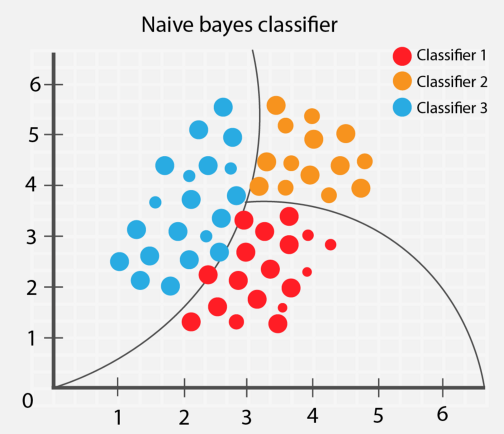

* It is a classiﬁcation technique based on **Bayes’ theorem** with an assumption of independence among predictors. 

* All attributes contribute equally and independently to the decision.

* In simple terms, a Naïve Bayes classiﬁer assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

* For example, a fruit may be considered to be an apple if it is red, round, and about three inches in diameter. Even if these features depend on each other or upon the existence of other features, all of these properties independently contribute to the probability that this fruit is an apple, and that is why it is
known as **naïve.**

* It turns out that in most cases, while such a naïve assumption is found to be
not true, the resulting classiﬁcation models do amazingly well.




## **Bayes’ Theorem**

* The Bayes’ theorem is used in Bayesian inference, usually dealing with a sequence of events, as new information becomes available about a subsequent event, that new information is used to update the probability of the initial event. 

* In this context, we encounter two flavors of probabilities: **prior probability** and **posterior probability**.

> * **Prior probability**: This is the initial probability about an event before any information is available about the event. In other words, this is the initial belief about a particular hypothesis before any evidence is available about the hypothesis.

> * **Posterior probability**: This is the probability value that has been revised by using new information that is later obtained from a subsequent event. In other words, this is the updated belief about the hypothesis as new evident becomes available.


* The formula for Bayes’ theorem is

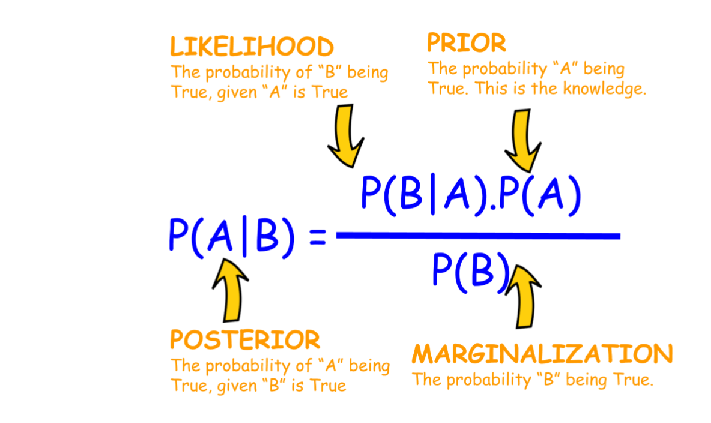


* Bayesian inference is a general principle about **learning from experience**. 

* It connects beliefs (**prior probabilities**) and evidences (**observed data**).

* Based on the evidence, the degree of belief is refined. 

* The degree of belief after conducting the experiment is called **posterior probability.**


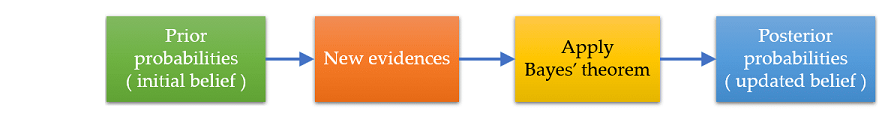



### **Example 1: Disease Diagnostics**

* We might be interested in finding out a patient’s probability of having **liver disease** if they are an **alcoholic**. 

* **Being an alcoholic** is the test (kind of like a litmus test) for **liver disease**.

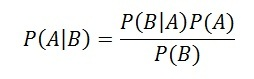


* **A** could mean the event **Patient has liver disease**. Past data tells you that 10% of patients entering your clinic have liver disease, thus, P(A) = 0.10.

* **B** could mean the **Patient is an alcoholic**. Five percent of the clinic’s patients are alcoholics, so, P(B) = 0.05.

* Among those patients diagnosed with liver disease, 7% are alcoholics. This is **P(B|A): the probability that a patient is alcoholic, given that they have liver disease, is 7%**


* Bayes’ theorem tells you that **P(A|B) = (0.07 * 0.1)/0.05 = 0.14**

* In other words, if the patient is an alcoholic, their chances of having liver disease is 0.14 (14%). This is a large increase from the 10% suggested by past data. But it’s still unlikely that any particular patient has liver disease.



### **Example 2: Playing Golf**

* As shown below the dataset has four attributes: **Outlook**, **Temperature**,  **Humidity**, and **Windy**, which are all different aspects of weather conditions. 

* Based on these four attributes, the goal is to predict the value of the **outcome variable Play** (yes or no) – whether the weather is suitable to play golf. 



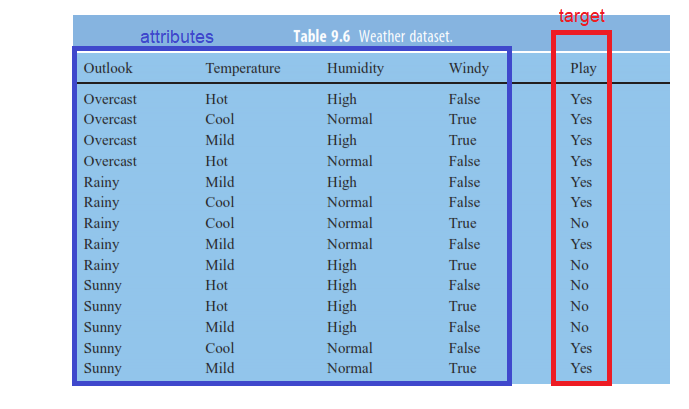


* Following are the steps of the algorithm through which we could accomplish that goal.

> * Step 1: First convert the dataset into a frequency table (see below).
> * Step 2: Create a likelihood table by ﬁnding the probabilities, like probability of being hot is 0.29 and probability of playing is 0.64 as shown below.
> * Step 3: Now, use the Naïve Bayesian equation to calculate the posterior probability for each class. 

* Conversion of the dataset to a frequency table and to a likelihood table:

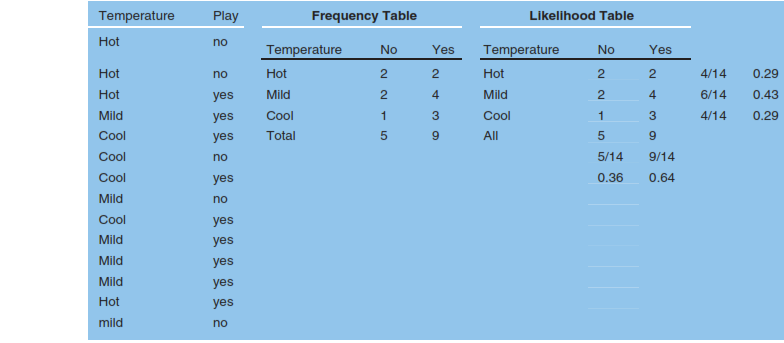

* The class with the highest posterior probability is the outcome of the prediction.

* To see this in action, let us say that we need to decide if one should go out to play when the **weather is mild** based on the dataset. Using Bayes’ theorem:

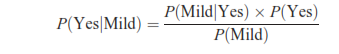

* Here, we have:

> * P(Mild|Yes) = 4/9 = 0.44
> * P(Mild) = 6/14 = 0.43
> * P(Yes|Mild) = (0.44 × 0.64)/0.43 = 0.65


* In other words, we have derived that the probability of playing when the weather is mild is 65%, and if we wanted to turn that into a Yes–No decision, we can see that this probability is higher than the mid-point, that is, 50%. 

* Thus, we can declare “Yes” for our answer.


## **Pythonian Approach**



In [1]:
import pandas as pd
import numpy as np

golfDF = pd.read_csv("https://gist.githubusercontent.com/kudaliar032/b8cf65d84b73903257ed603f6c1a2508/raw/aa4826eb745d09a2df4967a793410e141642cbed/golf-dataset.csv")

golfDF


,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


## **Data Preparation**

* First, we  need to convert these string labels into numbers. 

* For example: 'Overcast', 'Rainy', 'Sunny' as 0, 1, 2. 

* This is known as **label encoding**. 

* Scikit-learn provides **LabelEncoder** library for encoding labels with a value between 0 and one less than the number of discrete classes.


### **Approach #1**

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_golfDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, golfDF.shape[1]):
    if golfDF.dtypes[i]=='object' or golfDF.dtypes[i]=='bool':
        encoded_golfDF[golfDF.columns[i]] = le.fit_transform(golfDF[golfDF.columns[i]])



print("-=========================")
print(golfDF)
print("-=========================")
encoded_golfDF



-=========================
     Outlook  Temp Humidity  Windy Play Golf
0      Rainy   Hot     High  False        No
1      Rainy   Hot     High   True        No
2   Overcast   Hot     High  False       Yes
3      Sunny  Mild     High  False       Yes
4      Sunny  Cool   Normal  False       Yes
5      Sunny  Cool   Normal   True        No
6   Overcast  Cool   Normal   True       Yes
7      Rainy  Mild     High  False        No
8      Rainy  Cool   Normal  False       Yes
9      Sunny  Mild   Normal  False       Yes
10     Rainy  Mild   Normal   True       Yes
11  Overcast  Mild     High   True       Yes
12  Overcast   Hot   Normal  False       Yes
13     Sunny  Mild     High   True        No
-=========================


,Outlook,Temp,Humidity,Windy,Play Golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


## **Approach #2**

In [4]:
# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string attributes into numbers
outlook_encoded=le.fit_transform(golfDF['Outlook'])
temp_encoded=le.fit_transform(golfDF['Temp'])
humidity_encoded=le.fit_transform(golfDF['Humidity'])
windy_encoded=le.fit_transform(golfDF['Windy'])


# convert the taget now
labels = le.fit_transform(golfDF['Play Golf'])


# Combining all features
features = list(zip(outlook_encoded, temp_encoded, humidity_encoded, windy_encoded))

print(golfDF, "\n", pd.DataFrame(features))

print("\n\n")

print(labels)



     Outlook  Temp Humidity  Windy Play Golf
0      Rainy   Hot     High  False        No
1      Rainy   Hot     High   True        No
2   Overcast   Hot     High  False       Yes
3      Sunny  Mild     High  False       Yes
4      Sunny  Cool   Normal  False       Yes
5      Sunny  Cool   Normal   True        No
6   Overcast  Cool   Normal   True       Yes
7      Rainy  Mild     High  False        No
8      Rainy  Cool   Normal  False       Yes
9      Sunny  Mild   Normal  False       Yes
10     Rainy  Mild   Normal   True       Yes
11  Overcast  Mild     High   True       Yes
12  Overcast   Hot   Normal  False       Yes
13     Sunny  Mild     High   True        No 
     0  1  2  3
0   1  1  0  0
1   1  1  0  1
2   0  1  0  0
3   2  2  0  0
4   2  0  1  0
5   2  0  1  1
6   0  0  1  1
7   1  2  0  0
8   1  0  1  0
9   2  2  1  0
10  1  2  1  1
11  0  2  0  1
12  0  1  1  0
13  2  2  0  1



[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


## **Create the NB Classifier**

In [11]:
# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_golfDF.iloc[:,0:4]
y = encoded_golfDF.iloc[:,4]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.35, stratify=y)

# Display the sets
print(X_train)
print(X_test)


    Outlook  Temp  Humidity  Windy
1         1     1         0      1
6         0     0         1      1
10        1     2         1      1
13        2     2         0      1
3         2     2         0      0
5         2     0         1      1
9         2     2         1      0
2         0     1         0      0
4         2     0         1      0
    Outlook  Temp  Humidity  Windy
11        0     2         0      1
12        0     1         1      0
0         1     1         0      0
8         1     0         1      0
7         1     2         0      0


## **NB Model Classification Accuracy**

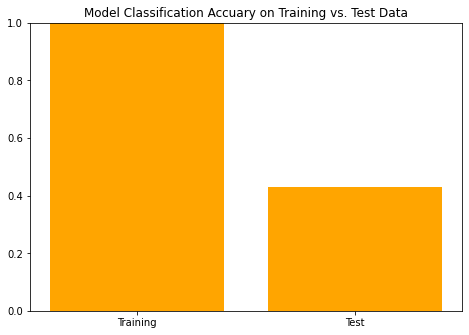

In [10]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()





# **References**

* A Hands-On Introduction to Data Science, Chirag Shah, Wiley.

* https://towardsdatascience.com/introduction-to-na%C3%AFve-bayes-classifier-fa59e3e24aaf
* https://towardsdatascience.com/bayes-rule-with-a-simple-and-practical-example-2bce3d0f4ad0
* https://www.gaussianwaves.com/2021/04/bayes-theorem/
* https://www.statisticshowto.com/probability-and-statistics/probability-main-index/bayes-theorem-problems/
* https://corporatefinanceinstitute.com/resources/knowledge/other/bayes-theorem/

* https://machinelearningmastery.com/bayes-theorem-for-machine-learning/
* https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

